**Ridge Regression and LASSO Regression**

In [1]:
#used to address the problem of multi-collinearity among variables that occurs while using linear regeression
#ridge regression= regularization term+OLS
#also known as L2 Regularization where L2-penality
#ridge -mean square error 
#lasso - mean absolute error
#lasso- is a type of linear regression that performs both variable selection and regularization to enhance prediction accuracy and interpretability

#ridge -->shrinks values closer to 0 but lasso---->shrinks values to 0
#lasso-->used when doing fewer predictions

Mean Squared Error: 91293939.24
Coefficients:
         Feature  Coefficient
0  SquareFootage   302.291409
1       Bedrooms   309.860180
2      Bathrooms   111.570781
3       Location  8644.660183
4      YearBuilt  4920.791177


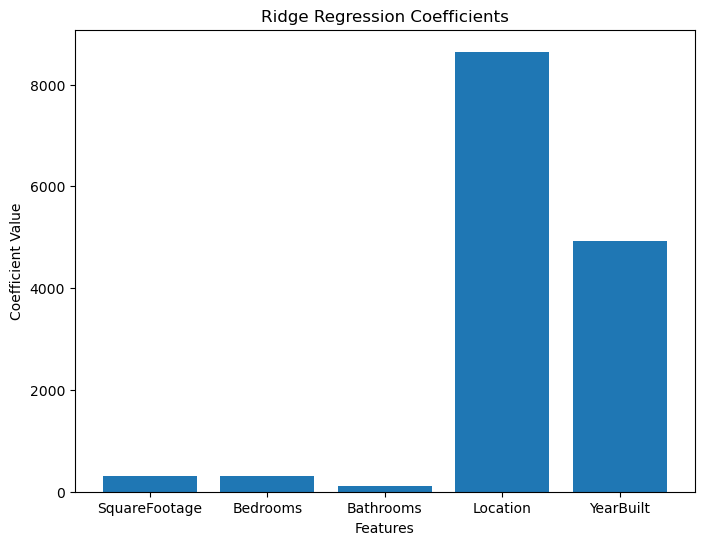

In [2]:
#Ridge Regression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simulating a dataset
np.random.seed(42)

# Features (5 features for houses)
n = 100  # number of samples
X = pd.DataFrame({
    'SquareFootage': np.random.normal(2000, 500, n),
    'Bedrooms': np.random.randint(1, 6, n),
    'Bathrooms': np.random.randint(1, 4, n),
    'Location': np.random.randint(1, 10, n),
    'YearBuilt': np.random.randint(1970, 2020, n)
})

# Simulating the target variable (house prices)
y = (300 * X['SquareFootage'] + 
     10000 * X['Location'] +
     5000 * (X['YearBuilt'] - 1970) +
     np.random.normal(0, 10000, n))  # Adding some noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge regression model
ridge = Ridge(alpha=100)  # alpha is the regularization parameter (lambda)
ridge.fit(X_train, y_train)

# Predicting on test set
y_pred = ridge.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Displaying the coefficients
print("Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})
print(coefficients)

# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(X.columns, ridge.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()


In [3]:
#LASSO Regression

Mean Squared Error: 91360381.83
Coefficients:
         Feature  Coefficient
0  SquareFootage   302.242661
1       Bedrooms     0.000000
2      Bathrooms     0.000000
3       Location  8740.609068
4      YearBuilt  4905.145698


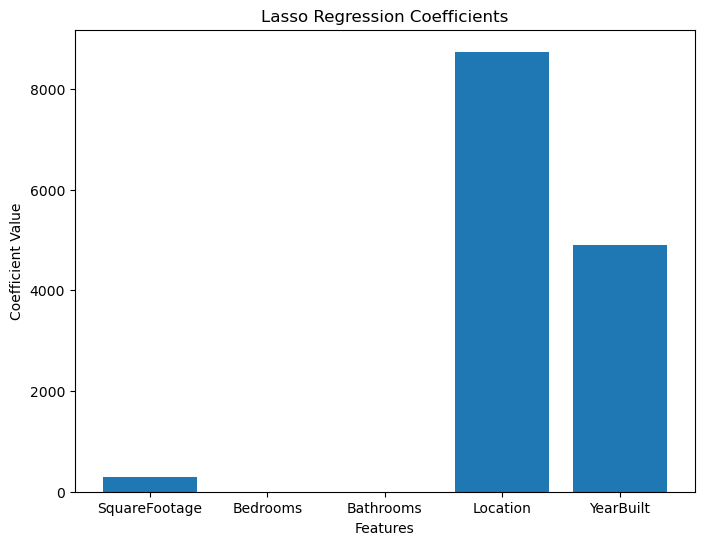

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simulating a dataset
np.random.seed(42)

# Features (5 features for houses)
n = 100  # number of samples
X = pd.DataFrame({
    'SquareFootage': np.random.normal(2000, 500, n),
    'Bedrooms': np.random.randint(1, 6, n),
    'Bathrooms': np.random.randint(1, 4, n),
    'Location': np.random.randint(1, 10, n),
    'YearBuilt': np.random.randint(1970, 2020, n)
})

# Simulating the target variable (house prices)
# Assuming only 'SquareFootage', 'Location', and 'YearBuilt' matter
y = (300 * X['SquareFootage'] + 
     10000 * X['Location'] +
     5000 * (X['YearBuilt'] - 1970) +
     np.random.normal(0, 10000, n))  # Adding some noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso regression model
lasso = Lasso(alpha=10000)  # alpha is the regularization parameter (lambda)
lasso.fit(X_train, y_train)

# Predicting on test set
y_pred = lasso.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Displaying the coefficients
print("Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(X.columns, lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()
